# Figuring Figures Out - A Matplotlib Tutorial, Part 2

In this tutorial, we'll explore the different coordinate systems within a figure and how you can exploit them to create amazing visuals.

## Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from PIL import Image
import urllib
import os

## The Data Coordinate System

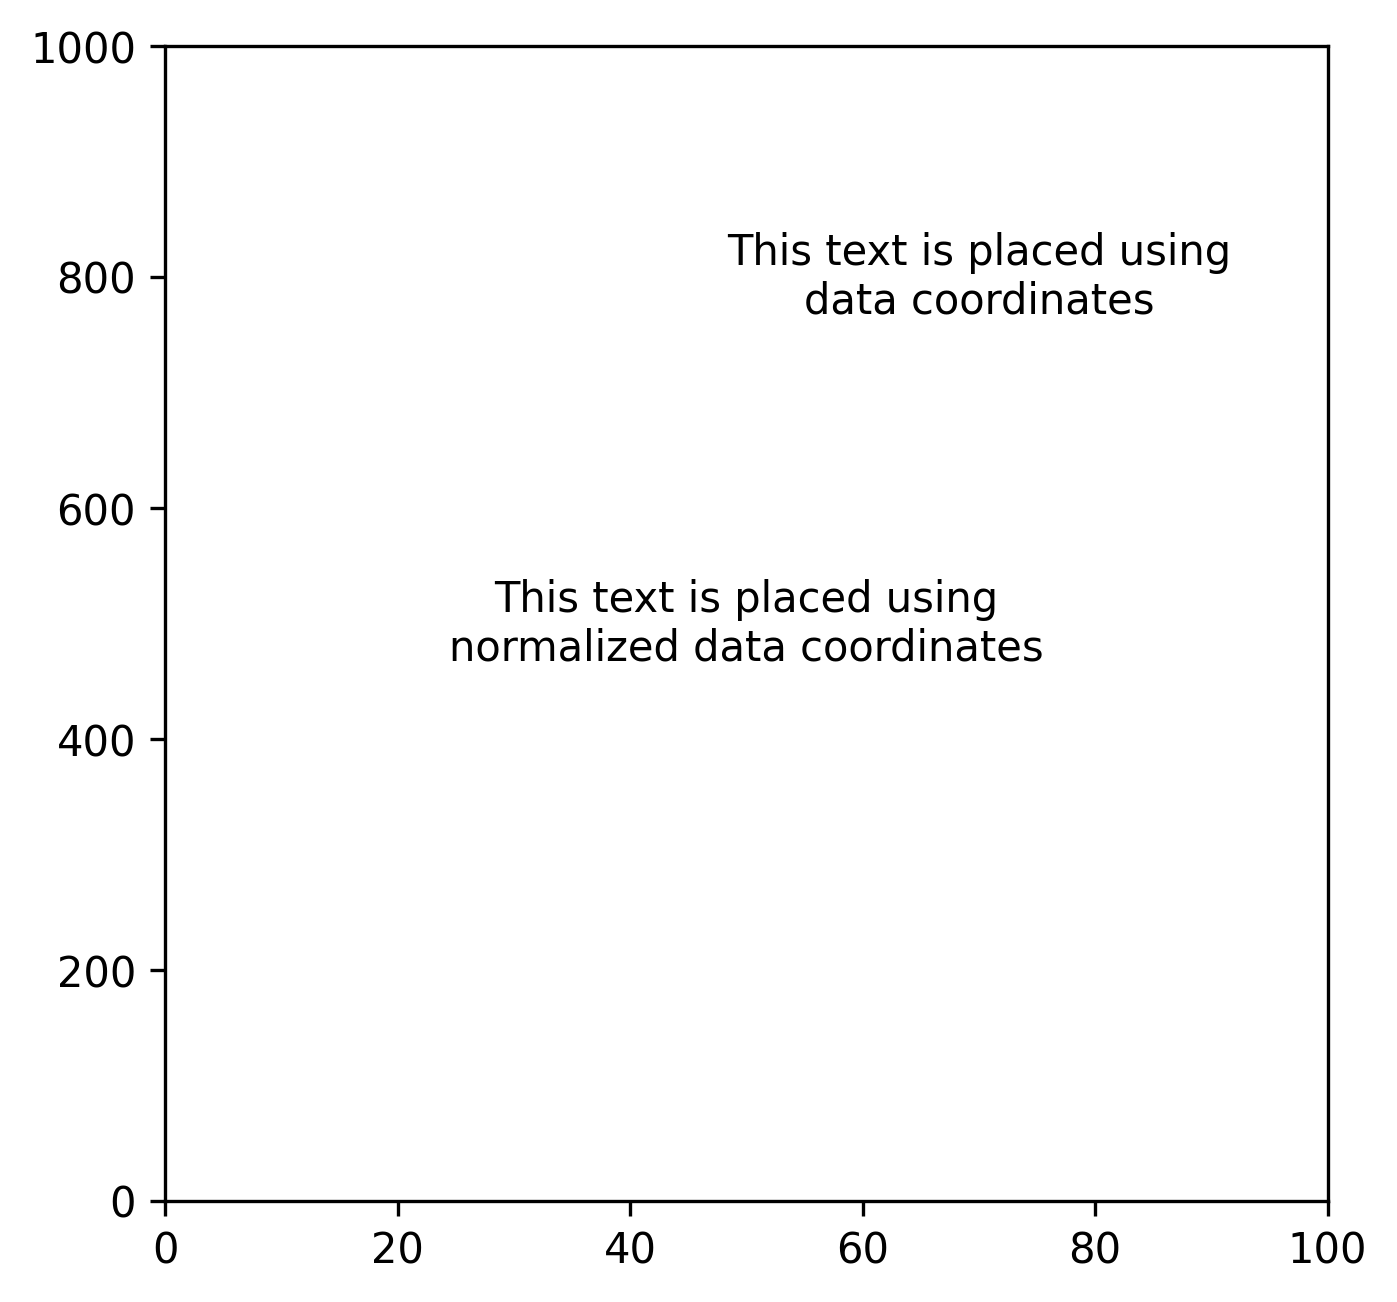

In [13]:
fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot()

ax.set_xlim(0,100)
ax.set_ylim(0,1000)


# -- Annotations --------------------------------
ax.annotate(
    xy=(70,800),
    text='This text is placed using\ndata coordinates',
    ha='center', va='center'
)

ax.annotate(
    xy=(.5,.5),
    text='This text is placed using\nnormalized data coordinates',
    ha='center', va='center',
    xycoords='axes fraction'
)

plt.savefig(
    'figures/data_coordinates.png',
    dpi=300,
    transparent=True
)

## The Figure Coordinate System

This example shows how the text is placed within the figure, regardless of the data limits of our axes. 

As an excercise, try changing the $x$ and $y$ limits of the axes to see that the position of the text remains the same.

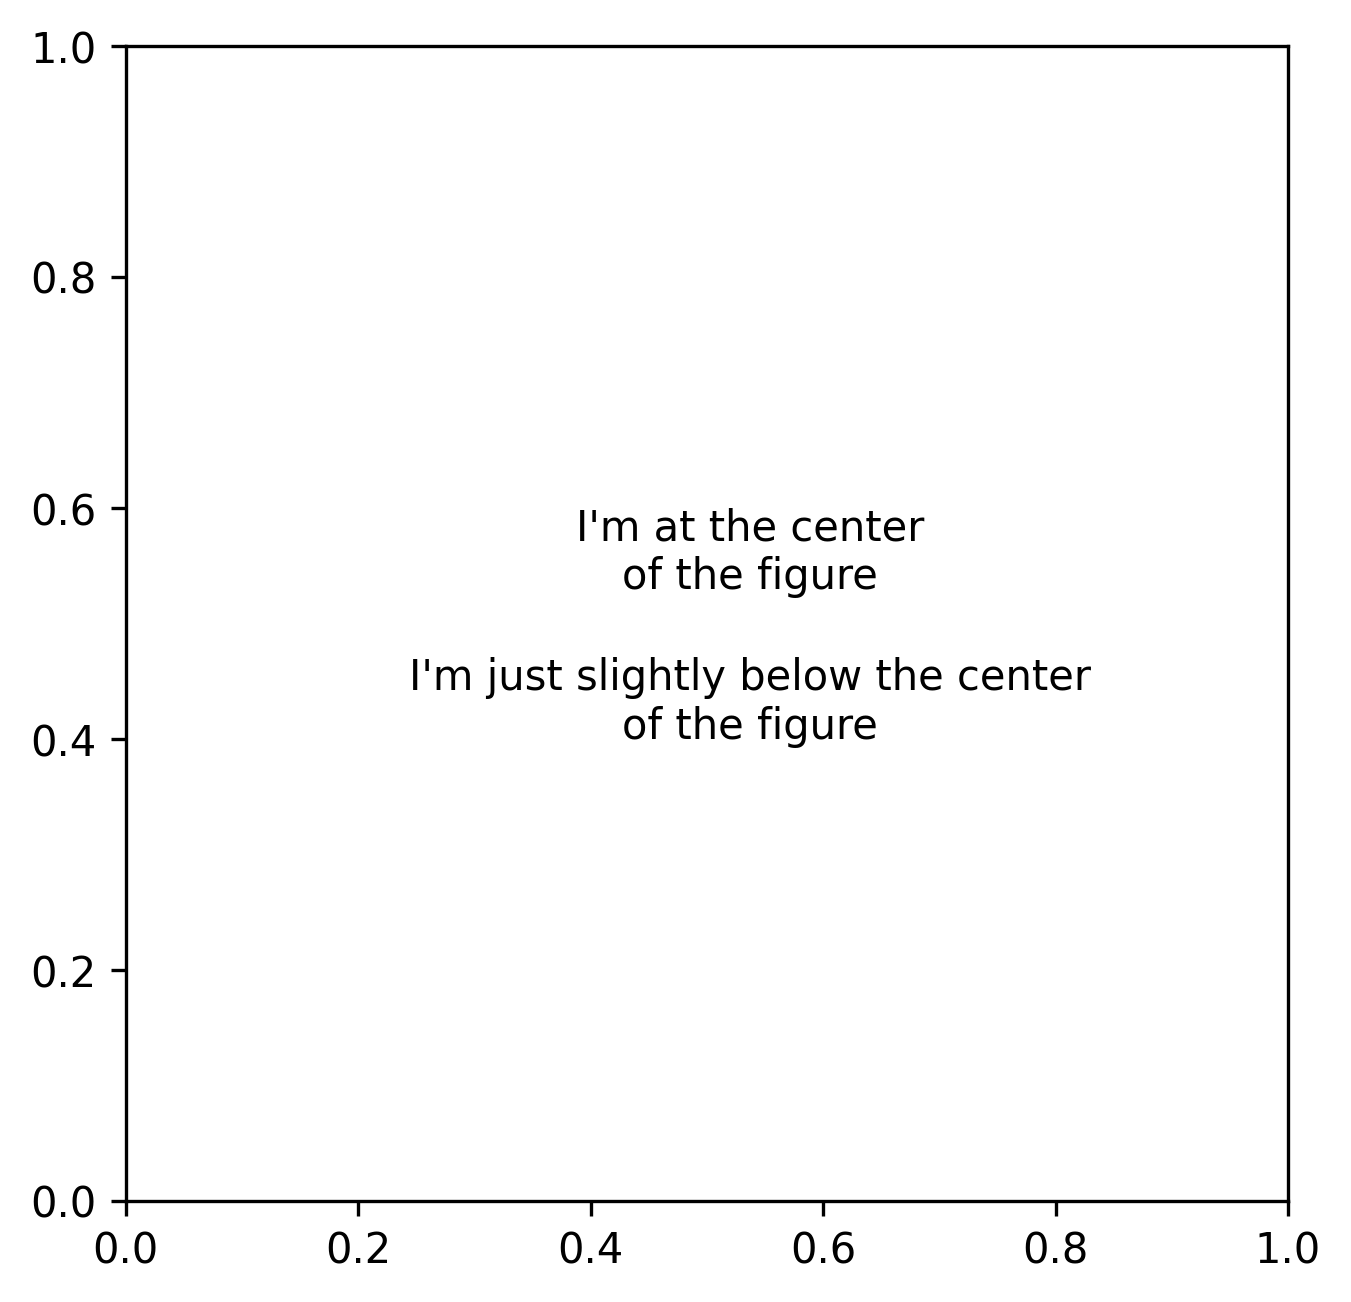

In [14]:
'''
A figure of dimensions of 5 inches wide and 5 inches high
Dots per inch of 300 (dpi) -- these are equivalent to pixels
So our figure is 1500 x 1500 pixels.
'''
fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot()

ax.annotate(
    xy=(750,750),
    text='I\'m at the center\nof the figure' ,
    xycoords='figure pixels',
    ha='center',
    va='center'
)

ax.annotate(
    xy=(.5,.4),
    text='I\'m just slightly below the center\nof the figure' ,
    xycoords='figure fraction',
    ha='center',
    va='center'
)

plt.savefig(
    'figures/figure_coordinates.png',
    dpi=300,
    transparent=True
)


## Transforms & Coordinates in Practice

### Logos as Scatter Plots

In this example, we will add a bunch of team logos to replace markers in our plot.

We being by defining a function that takes the [Fotmob](https://www.fotmob.com/) `team_id` and returns the drawing at the specified `axes`.

In [15]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

Let's begin with a simple example.

Data coordinates (x,y) = (2.5,1) in pixels: 
(768.75, 297.0)
Pixel coordinates (x,y) = (768.75, 297.0) in figure fraction: 
(0.51, 0.50)


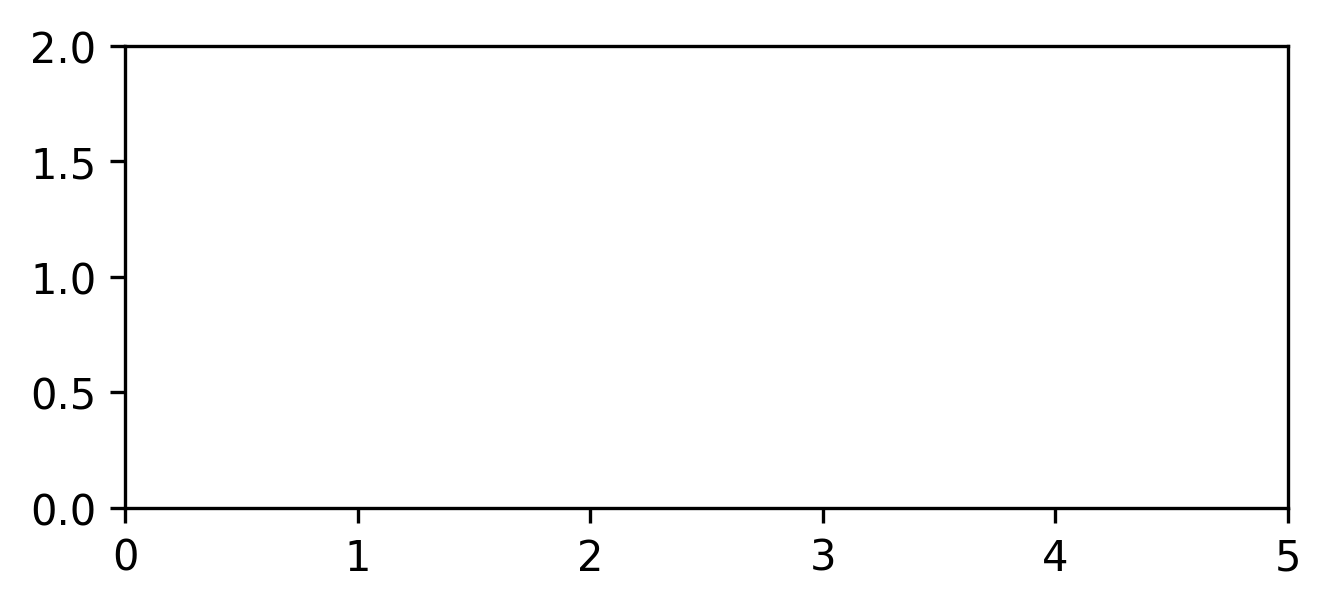

In [16]:
fig = plt.figure(figsize=(5,2), dpi=300)
ax = plt.subplot(111)

ax.set_xlim(0,5)
ax.set_ylim(0,2)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform

pixel_coords = DC_to_FC((2.5,1))
figure_fraction_coords = FC_to_NFC(pixel_coords)

print(
f'''Data coordinates (x,y) = (2.5,1) in pixels: 
({pixel_coords[0]}, {pixel_coords[1]})'''
)
print(
f'''Pixel coordinates (x,y) = ({pixel_coords[0]}, {pixel_coords[1]}) in figure fraction: 
({figure_fraction_coords[0]:.2f}, {figure_fraction_coords[1]:.2f})'''
)
plt.savefig(
    'figures/empty_fig_transforms.png',
    dpi=300,
    transparent=True
)

For our next step, we will add axes to our figure using the `add_axes` method at specific locations using random data.

In [17]:
np.random.seed(120)
x_loc = np.random.uniform(0.1,.9,10)
y_loc = np.random.uniform(0.1,.9,10)

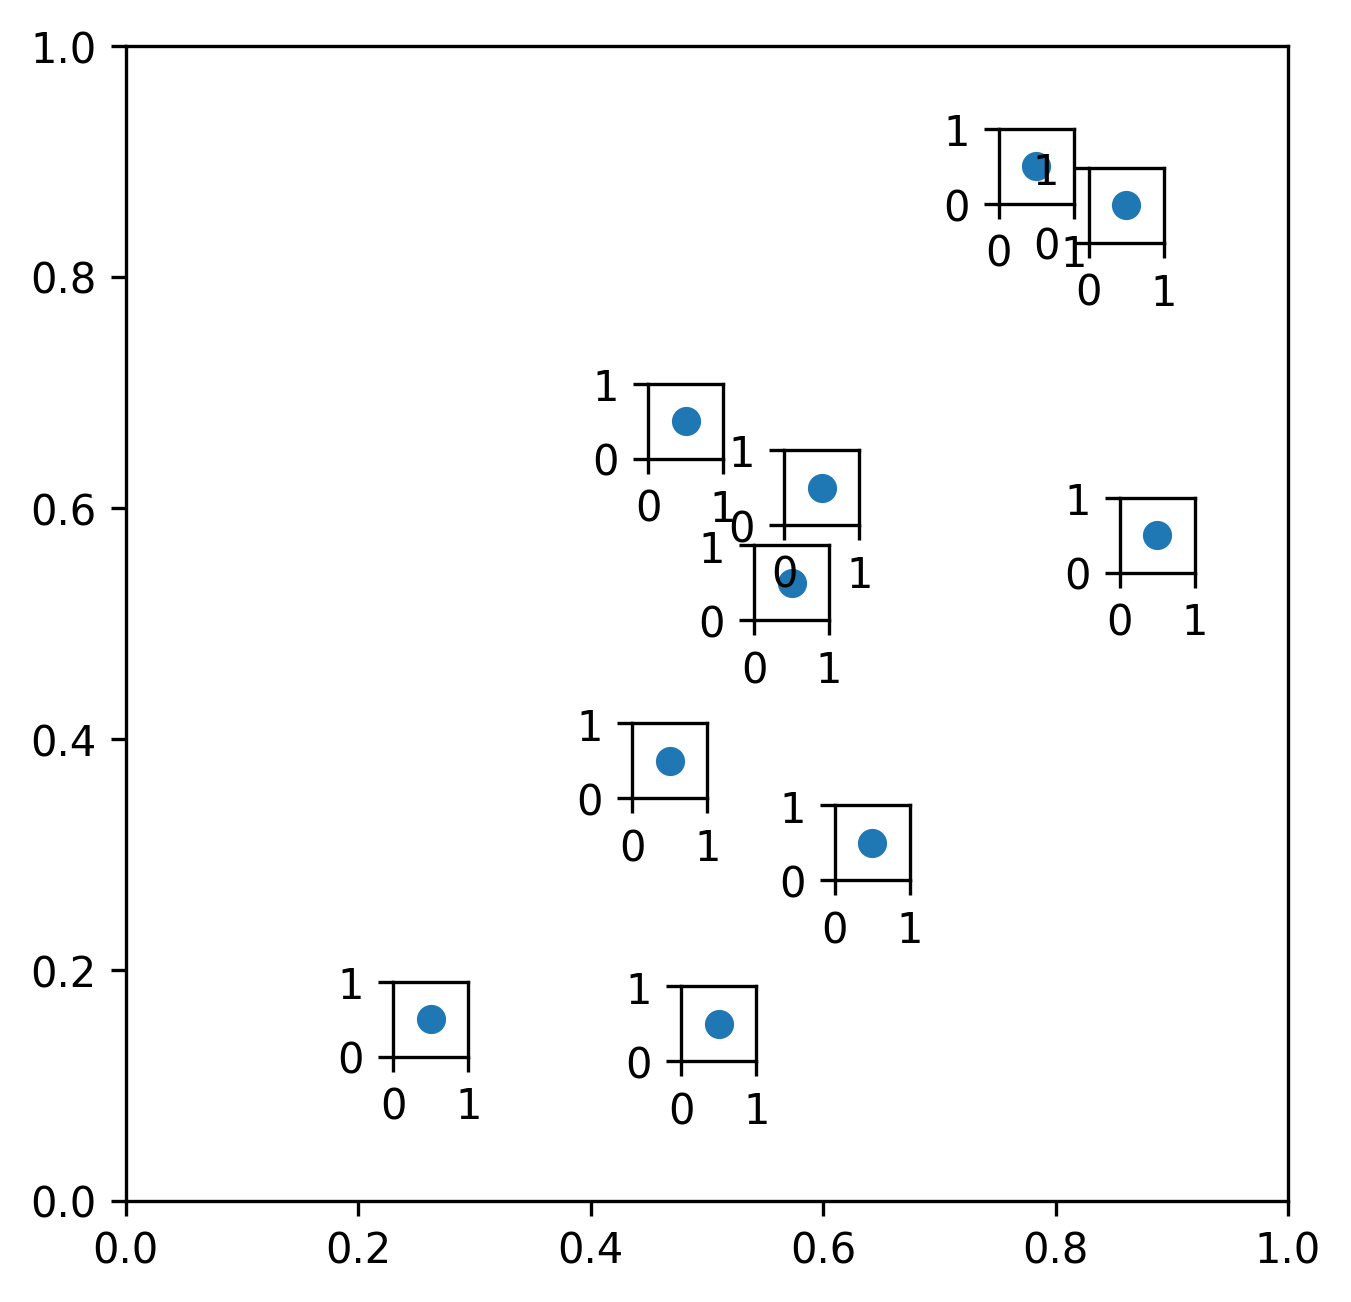

In [18]:
fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot()

ax.set_xlim(0,1)
ax.set_ylim(0,1)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

for x,y in zip(x_loc, y_loc):
    ax_coords = DC_to_NFC((x,y))
    fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )

ax.scatter(x_loc, y_loc, zorder=3)
plt.savefig(
    'figures/scatter_axes_figure.png',
    dpi=300,
    transparent=True
)

To finalize this section, we declare ten random club IDs to plot the crests.

In [19]:
clubs = [
    4616,
    210173,
    8044,
    9991,
    9860,
    8003,
    8695,
    8654,
    9731,
    10154
]

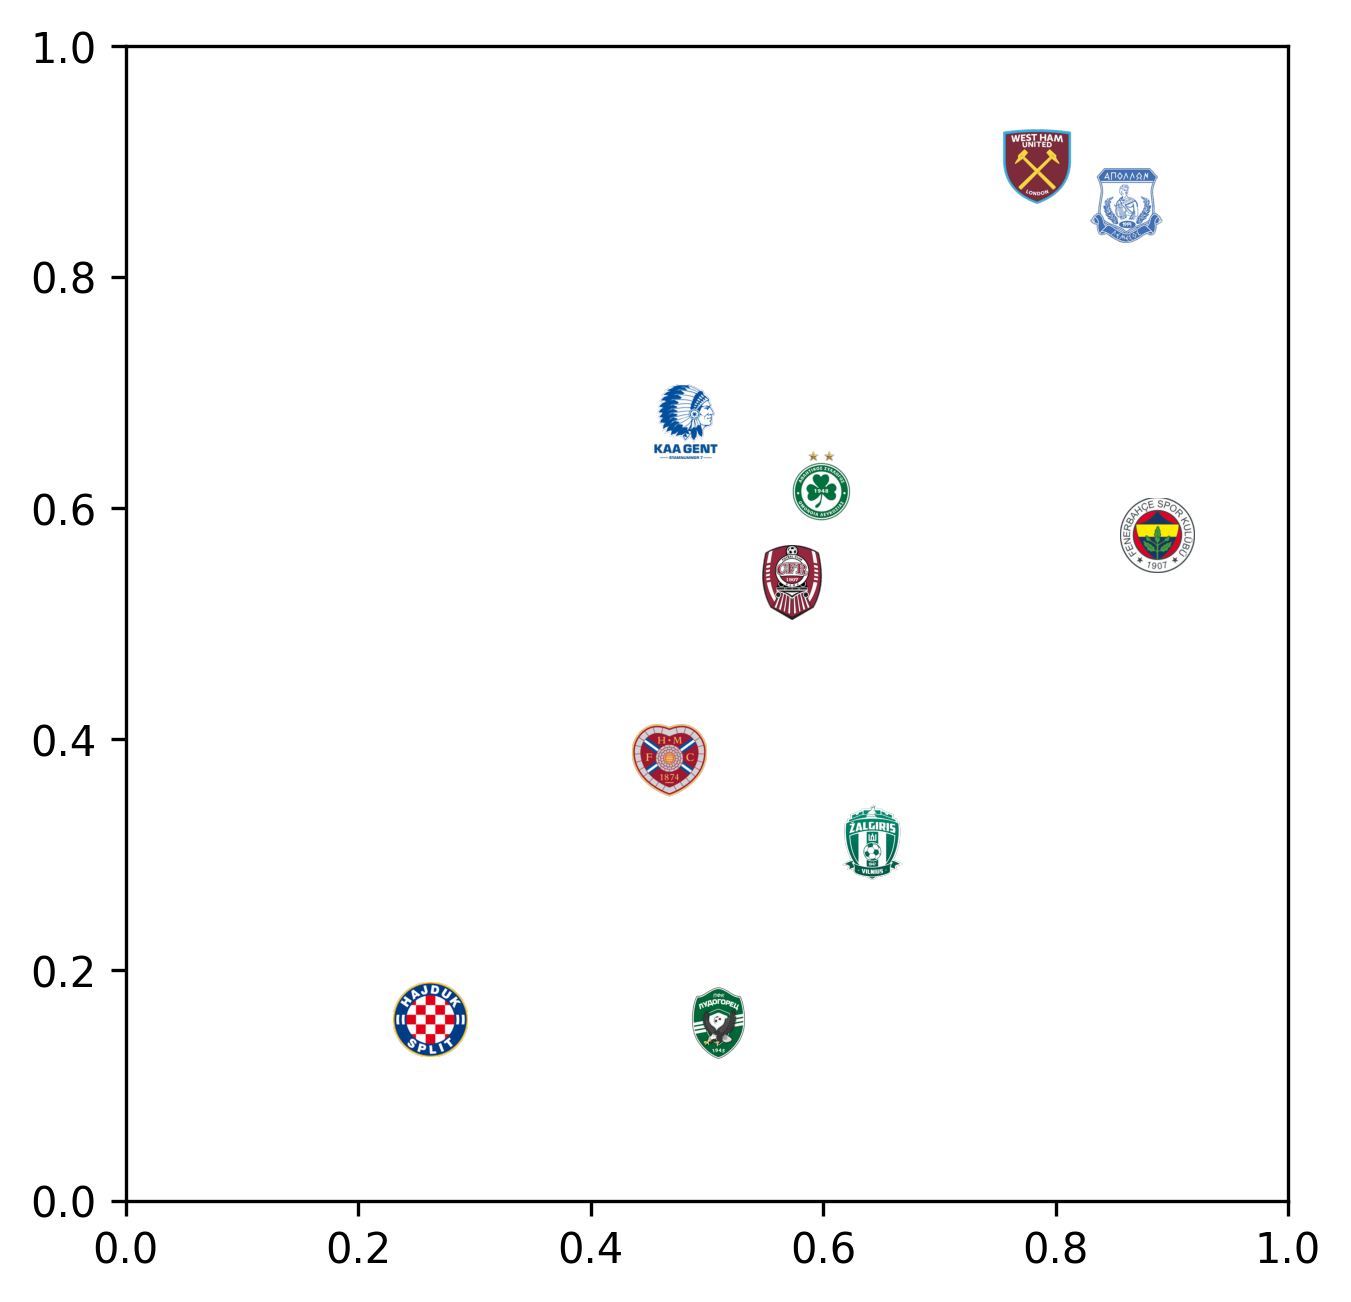

In [20]:
fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot()

ax.set_xlim(0,1)
ax.set_ylim(0,1)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

counter = 0
for x,y in zip(x_loc, y_loc):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)

    counter += 1
    
plt.savefig(
    'figures/scatter_logo_axes_figure.png',
    dpi=300,
    transparent=True
)

## Final Excercise Solution

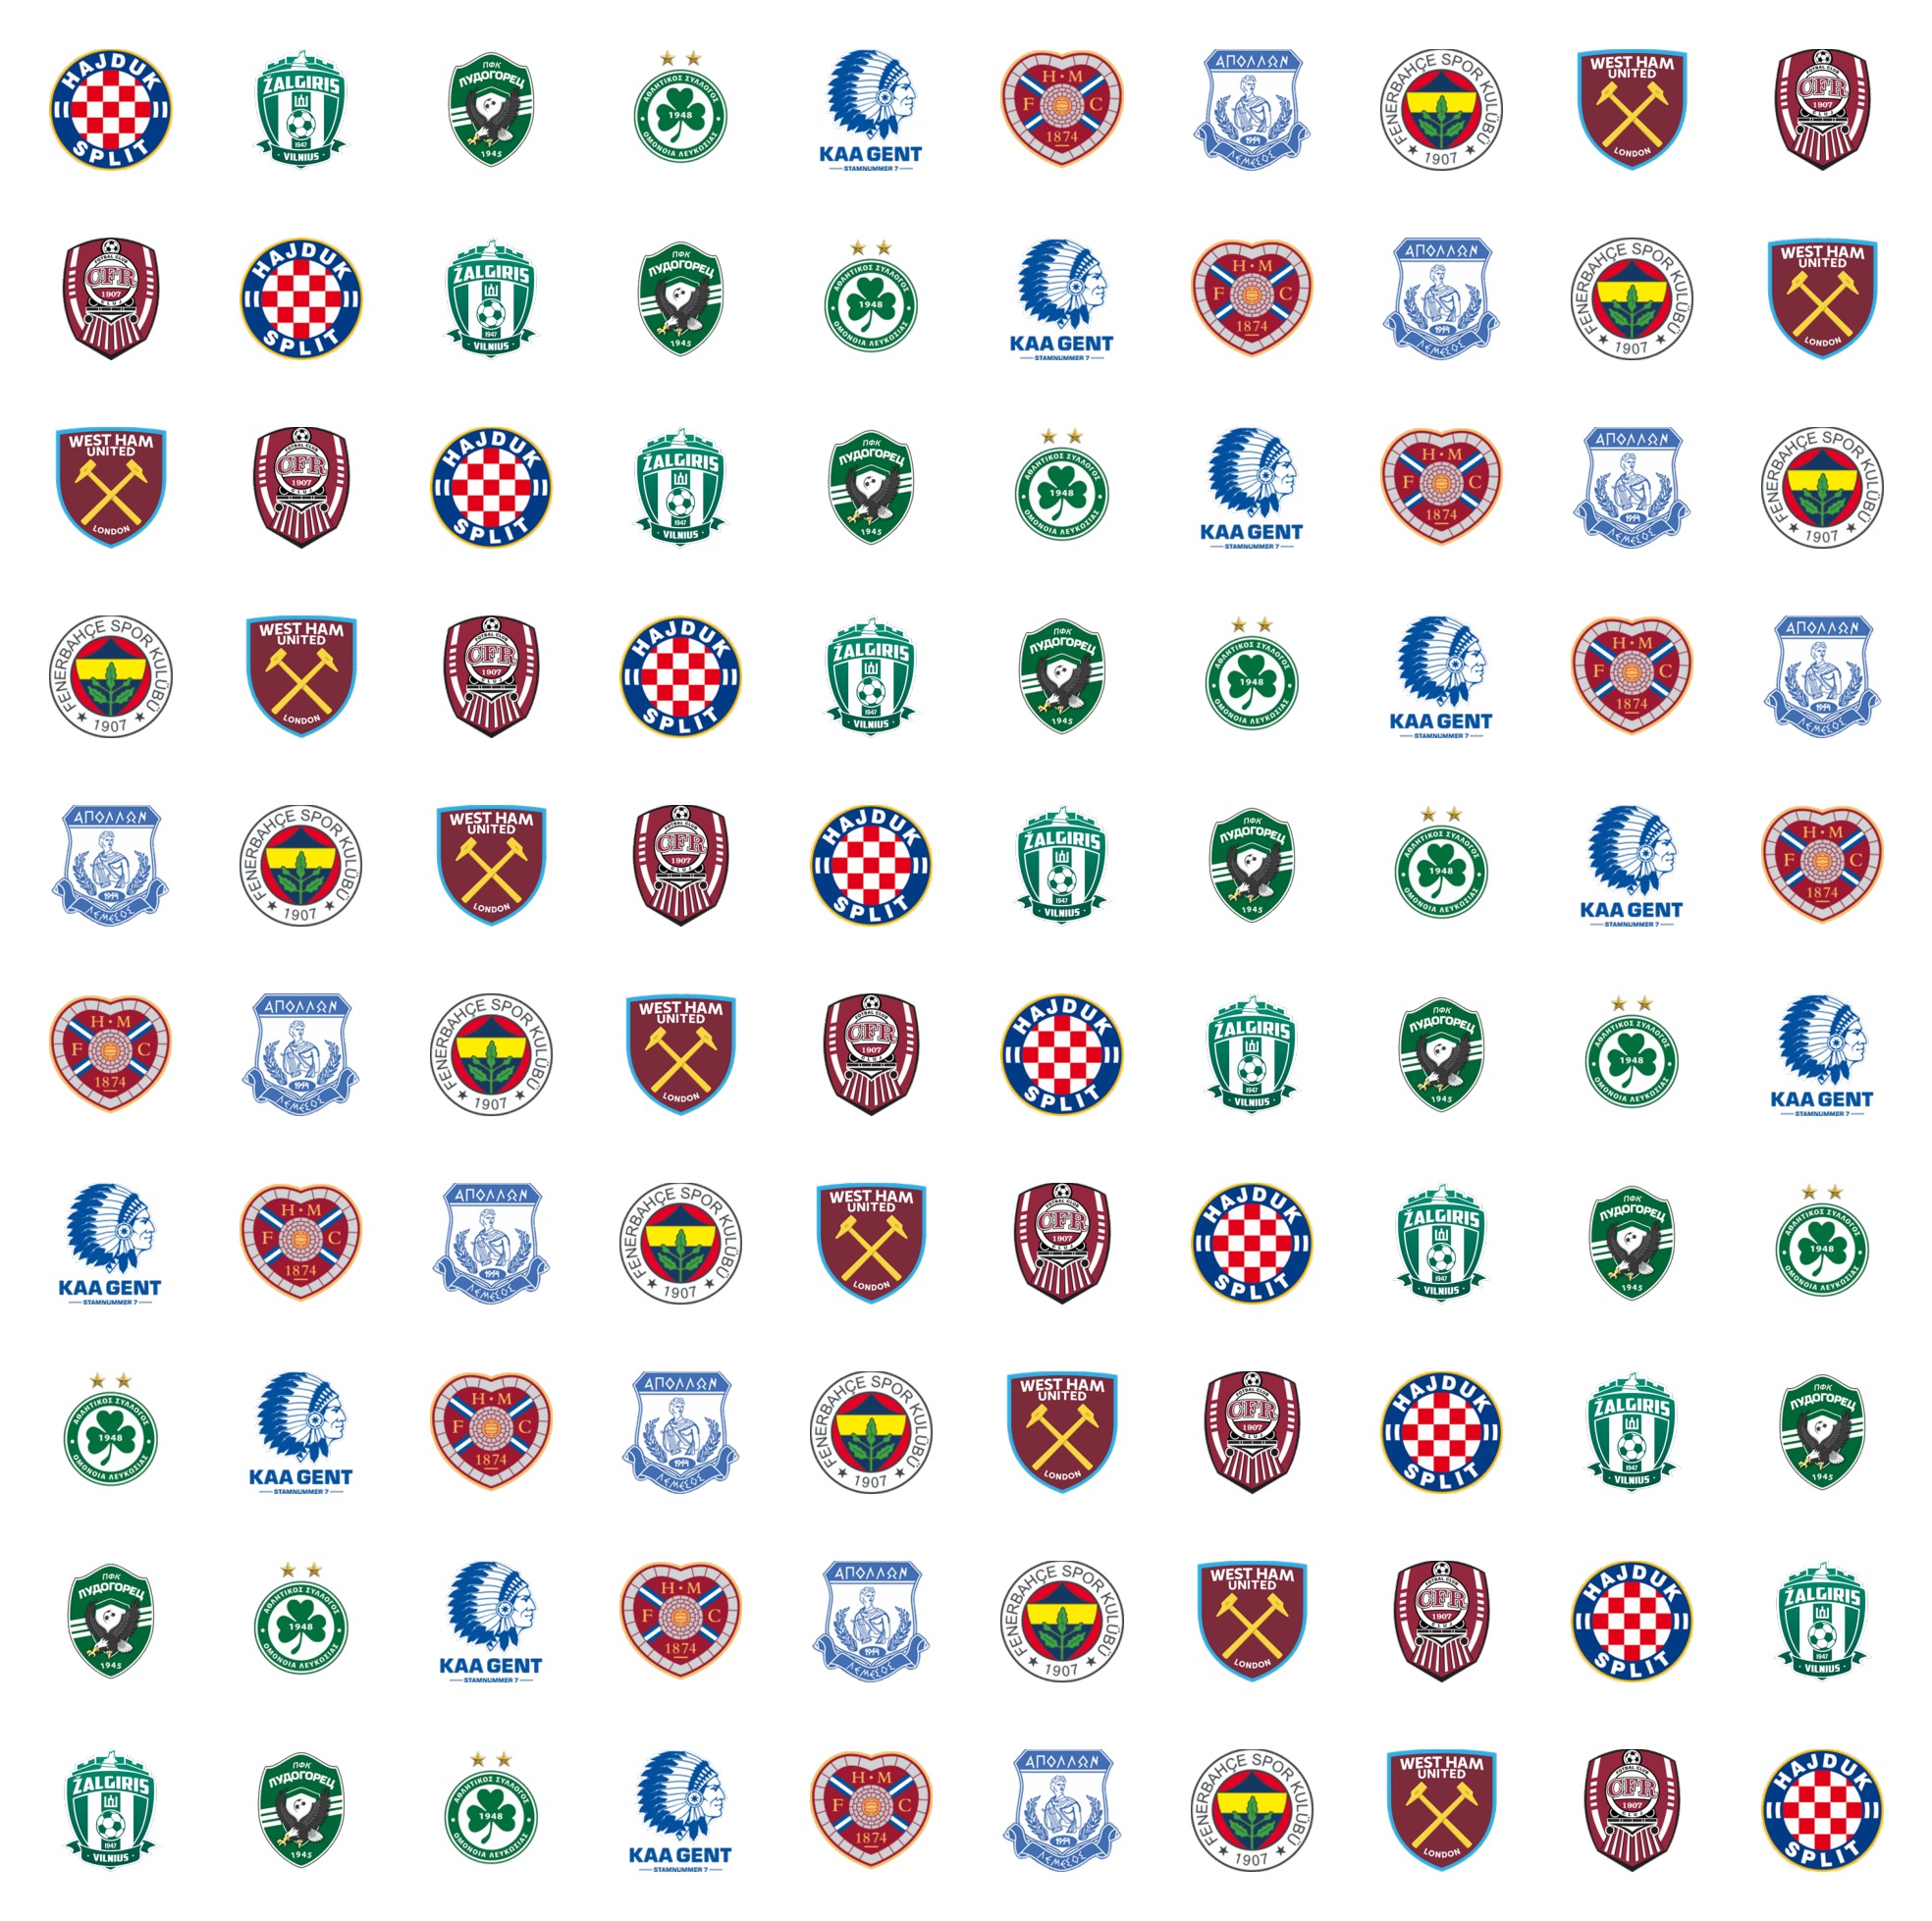

In [21]:
fig = plt.figure(figsize=(5,5), dpi=500)
ax = plt.subplot()
ax.set_visible(False)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

for x in range(0,10):
    for y in range(0,10):
        ax_coords = DC_to_NFC((x/10,y/10))
        image_ax = fig.add_axes(
            [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
            fc='None'
        )
        if x + y > 9:
            pos = x + y - 10
        else:
            pos = x + y
        ax_logo(clubs[pos], image_ax)

plt.savefig(
    'figures/scatter_logo_excercise.png',
    dpi=500,
    transparent=True,
    bbox_inches='tight'
)